# 1. ReLU Nerual Network on $\mathbb{R}$

In [1]:
import time
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import solution1

def plot_helper1(funcs):
    x = np.linspace(-5,5,1001)
    plot_nums = len(funcs)
    fig, axs = plt.subplots(1,plot_nums,figsize = [plot_nums*3,2],sharey=True,sharex=True)
    for ith, func in enumerate(funcs):
        y = func(x)
        axs[ith].plot(x,y)
        axs[ith].grid()

## Variations of ReLU

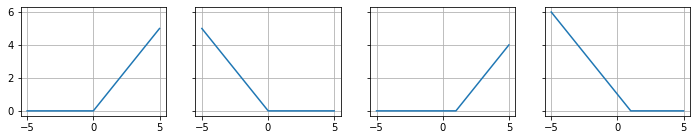

In [2]:
r = lambda x: (x > 0) * x
r_inv = lambda x: r(-x)
t = lambda x: r(x-1)
t_inv = lambda x: r_inv(x-1)
funcs1 = [r,r_inv,t,t_inv]
plot_helper1(funcs1)

## Hat function

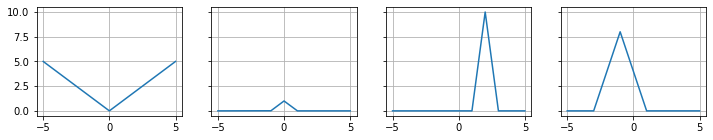

In [3]:
f1 = lambda x: r(x) + r_inv(x)
f2 = lambda x: r(1-f1(x))
x1, y1, width1 = 2, 10, 2
f3 = lambda x: f2((x-x1)/(width1/2))*y1
x2, y2, width2 = -1, 8, 4
f4 = lambda x: f2((x-x2)/(width2/2))*y2
funcs2 = [f1,f2,f3,f4]
plot_helper1(funcs2)

## Piecewise linear approximation by hat functions

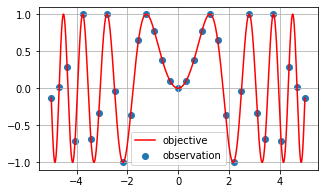

In [4]:
func_obj = lambda x: np.sin(x**2) 
grid_points = 33  # 33 = 2^5 + 1
x_grid = np.linspace(-5,5,grid_points)
y_grid = func_obj(x_grid)

plt.figure(figsize = [5,3])
x = np.linspace(-5,5,1001)
plt.plot(x,func_obj(x),'r')
plt.scatter(x_grid,y_grid)
plt.legend(['objective', 'observation'])
plt.grid()
plt.show()

## Q1: 
Objective function:
$$
f(x) = \sin(x^2),\quad x \in \mathbb{R}.
$$
Construct a neural network $f_{nn}$ such that 
$$
f_{nn}(x) = f(x),\quad \forall x \in \text{x_grid} 
$$
(i.e. they match values on observation points). Actually $f_{nn}$ is a scaled Faber-Schauder
expansion of $f$.

How should we select the width?

In [5]:
def plot_helper2(func_obj, func):
    x = np.linspace(-5,5,1001)
    plt.figure(figsize = [6,3])
    plt.plot(x,func_obj(x))
    plt.plot(x,func(x))
    plt.legend(['Objective function' , 'Approximation'])
    plt.grid()
    plt.show()

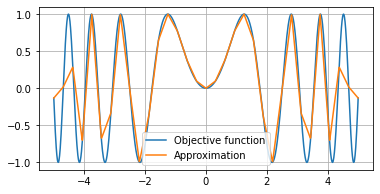

In [6]:
# piecewise interpolation 
width = 10/(grid_points-1)
# Write your own func_nn here 
func_nn = solution1.construct_func_nn(x_grid,y_grid,width,f2) # please comment this line while solving exercise 

plot_helper2(func_obj, func_nn)

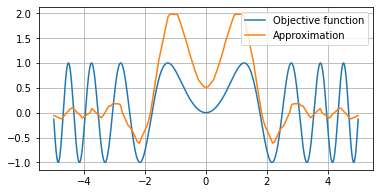

In [7]:
# wrong width, not match on grid
width = 1
# Write your own func_nn here 
func_nn = solution1.construct_func_nn(x_grid,y_grid,width,f2) # please comment this line while solving exercise 

plot_helper2(func_obj, func_nn)

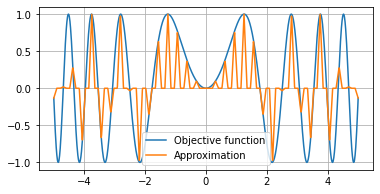

In [8]:
# overfitting 
width = 0.1
# Write your own func_nn here 
func_nn = solution1.construct_func_nn(x_grid,y_grid,width,f2) # please comment this line while solving exercise 

plot_helper2(func_obj, func_nn)

# 2. ReLU Nerual Network on $\mathbb{R}^2$

## Q2:
Construct 4 neural networks correponding to the following figures.

In [9]:
from matplotlib import cm
def plot_helper3(funcs):
    fig, ax = plt.subplots(1,4,subplot_kw={"projection": "3d"},figsize = [16,4], sharex = True, sharey = True)
    for i,func in enumerate(funcs):
        X = np.arange(-5, 5, 0.25)
        Y = np.arange(-5, 5, 0.25)
        X, Y = np.meshgrid(X, Y)
        Z = func(X,Y)
        surf = ax[i].plot_surface(X, Y, Z, cmap=cm.coolwarm)
    plt.show()

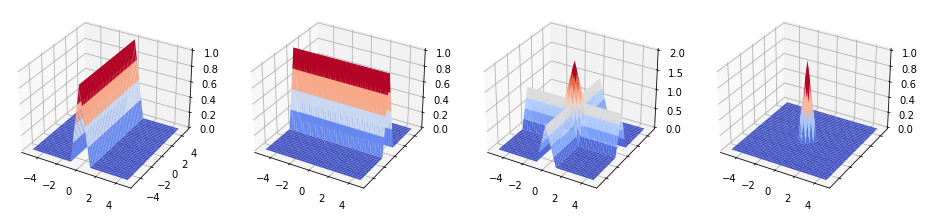

In [10]:
# Write your own func_nn here 
funcs = solution1.construct_hat2d(r,f2)  # please comment this line while solving exercise 
plot_helper3(funcs)

You might find this website with visualization on $\mathbb{R}^2$ helpful: https://playground.tensorflow.org/

# 3. ReLU Nerual Network from $\mathbb{R}^m$ to $\mathbb{R}^n$
In this section, we shortly introduce how to use keras to build neural networks. 

Nice tutorials:
- https://www.tensorflow.org/guide/keras/sequential_model
- https://www.tensorflow.org/guide/keras/functional

In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.4.1


In [12]:
# Sequential 
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="tanh", name="layer2")
layer3 = layers.Dense(4, name="layer3")
model1 = keras.Sequential([layer1, layer2, layer3])
model1.build((None,2))
# model1.summary()

In [13]:
# Functional
inputs = keras.Input(shape=(2,))
x = layer1(inputs)
x = layer2(x)
outputs = layer3(x)
model2 = keras.Model(inputs=inputs, outputs=outputs)
# model2.summary()

Construct a (ReLU) neural network  : $\mathbb{R}^2 \to \mathbb{R}$ with 2 hidden layers, each with 10 neurals. 

In [14]:
# write your own neural network below 
func_nn = solution1.construct_nn()# please comment this line while solving exercise 
func_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 10)                30        
_________________________________________________________________
layer2 (Dense)               (None, 10)                110       
_________________________________________________________________
layer3 (Dense)               (None, 1)                 11        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


b) Let $T = 10$ and 
$$
S_{t+1} = S_t + \text{func_nn}(S_t,t)ï¼Œ\quad t = 0, \dots, 9.
$$
Construct a neural network such that
$$V_{nn} \colon S_0 \mapsto S_T$$

In [15]:
# write your own neural network below 
model = solution1.construct_Vnn(func_nn)# please comment this line while solving exercise 
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
tf.compat.v1.shape (TFOpLambda) (2,)                 0           input_2[0][0]                    
__________________________________________________________________________________________________
tf.ones (TFOpLambda)            (None, 1)            0           tf.compat.v1.shape[0][0]         
__________________________________________________________________________________________________
tf.math.multiply (TFOpLambda)   (None, 1)            0           tf.ones[0][0]                    
____________________________________________________________________________________________

In [16]:
S = tf.constant([[1]])
model(S)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[9.0294485]], dtype=float32)>